# Airline Passenger Satisfaction
__What factors lead to customer satisfaction for an Airline?__

__Задания:__

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)
8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра) 9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
10. По желанию: запустить другие классификаторы. Сравнить результаты
11. По желанию: как-то побороться с несбалансированностью классов (если она есть)
12. По желанию: исключить коррелированные переменные (объяснить зачем)
13. Сделать общие выводы

## 0. Описать задачу словами

Набор данных взят с Kaggle: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/?select=test.csv

Набор данных состоит из 103904 и 25976 записей в обучающем и тестовом режимах соответственно. 
Данный набор данных содержит опрос об удовлетворенности авиапассажиров. Он состоит из 25 столбцов, таких как «Возраст», «Пол», «Класс путешествия», «Задержки прибытия и отправления», а также функций, влияющих на уровень удовлетворенности клиентов, таких как «Обслуживание на борту», «Чистота», «Комфорт сиденья», «Обработка багажа» и т.д. 
Набор данных состоит из столбца или функция под названием «удовлетворение» , которая описывает общий уровень удовлетворенности клиента. Он имеет два значения: «нейтральный или неудовлетворенный» и «удовлетворенный».
Этот признак удовлетворенности считается признаком маркировки, поскольку он передает общее впечатление клиента на основе оценок. 

Таким образом, поставлена задача __классификации__: необходимо предсказать к какому из двух уровней удовлетворённости относится пассажир:  __«нейтральный__ или __неудовлетворенный»__ и __«удовлетворенный»__.

Признаки.
- __Gender__ - Пол. Бинарный признак. Типы: Female (Женский), Male (Мужской).
- __Customer Type__ - Тип клиента. Бинарный признак. Типы: Loyal customer (Лояльный клиент) и Disloyal customer (Нелояльный клиент).
- __Лояльный клиент__ - это клиент, лояльный к авиакомпании, то есть чаще предпочитающий пользоваться услугами данной авиакомпании нежели другой. Нелояльный - чаще пользующийся услугами другой компании.
- __Age__ - Возраст. Количественный признак.
- __Type of Travel__ - Цель полета пассажира. Бинарный признак. Типы: Personal Travel (Личная поездка), Business Travel (Деловая поездка).
- __Class__ - Туристический класс, которым летит пассажир. Категориальный признак. Типы: Business (Бизнес), Eco (Эконом), Eco Plus (Эконом Плюс).
- __Flight Distance__ - Расстояние полета. Количественный признак.
- __Inflight wifi service__ - уровень удовлетворенности услугой Wi-Fi - от 1 до 5. Количественный признак.
- __Departure/Arrival time convenient__ - Уровень удовлетворенности тем, насколько удобно было время отправления/прибытия. Количественный признак.
- __Ease of Online booking__ - Уровень удовлетворенности простотой онлайн-бронирования. Количественный признак.
- __Gate location__ - Уровень удовлетворенности расположением выходов. Количественный признак.
- __Food and drink__ - Уровень удовлетворенности едой и напитками. Количественный признак.
- __Online boarding__ - Уровень удовлетворенности онлайн регистрацией на рейс. Количественный признак.
- __Seat comfort__ - Уровень удовлетворенности комфортабельностью кресел. Количественный признак.
- __Inflight entertainment__ - Уровень удовлетворенности развлечениями во время полета. Количественный признак.
- __On-board service__ - Уровень удовлетворенности услугами на борту. Количественный признак.
- __Leg room service__ - Уровень удовлетворенности количеством места для ног. Количественный признак.
-__Baggage handling__ - Уровень удовлетворенности услугами по транспортировке багажа. Количественный признак.
-__Checkin service__ - Уровень удовлетворенности услугой регистрации на рейс. Количественный признак.
- __Inflight service__ - Уровень удовлетворенности услугами во время полета. Количественный признак.
- __Cleanliness__ - Уровень удовлетворенности чистотой. Количественный признак.
- __Departure Delay in Minutes__ - Задержка отправления в минутах. Количественный признак.
- __Arrival Delay in Minutes__ - Задержка прибытия в минутах. Количественный признак.
- __Satisfaction__ - Уровень удовлетворенности. Бинарный признак. Типы: satisfaction, neutral or dissatisfied.

##  Прочитать данные

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [138]:
data_train = pd.read_csv("https://github.com/flapflapdany/ML_2/blob/main/train.csv")
data_test = pd.read_csv("https://github.com/flapflapdany/ML_2/blob/main/test.csv")

In [139]:
data_raw = pd.concat([data_test, data_train])

In [140]:
data_raw.shape

(129880, 25)

In [141]:
data_raw.columns.tolist()

['Unnamed: 0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [142]:
data_raw.head(10) #Данные в начале

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [143]:
data_raw.tail(10) #Данные в конце

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103895,103895,66030,Female,disloyal Customer,24,Business travel,Eco,1055,1,1,...,1,3,3,5,5,4,1,13,10.0,neutral or dissatisfied
103896,103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied
103898,103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [144]:
data_raw.info() # Выведем информацию в более читаемом виде

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

__Вывод:__ Имеются пропущенные значения. В столбце "Arrival Delay in Minutes" пропущено 393 значений.
Признаки  "Unnamed" и "id" не несут полезной информации и от них стоит избавиться.

In [145]:
data_raw = data_raw.drop(['Unnamed: 0', 'id'], axis = 1)

Столбцы 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction' содержат категориальные признаки. Необходимо заменить их тип 'Object' на специальный, предназначенный для хранения категориальных значений



In [146]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['Customer Type'] = data_raw['Customer Type'].astype('category')
data_raw['Type of Travel'] = data_raw['Type of Travel'].astype('category')
data_raw['Class'] = data_raw['Class'].astype('category')

# data_raw['Inflight wifi service'] = data_raw['Inflight wifi service'].astype('category')
# data_raw['Food and drink'] = data_raw['Food and drink'].astype('category')
# data_raw['Checkin service'] = data_raw['Checkin service'].astype('category')
# data_raw['Cleanliness'] = data_raw['Cleanliness'].astype('category')

data_raw.iloc[:,list(range(6, 20))] = data_raw.iloc[:,list(range(6, 20))].astype('category')

In [147]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding           

Приведем описание следующей таблице:
- count - количество значений для каждого признака;
- min/max - минимальное / макcимальное значение;
- mean - среднее значение;
- std - стандартное отклонение;  
- 25% - первый квартиль; 
- 50% - второй квартиль; 
- 75% - третий квартиль. 

In [148]:
data_raw.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Проверим на сбалансированность:

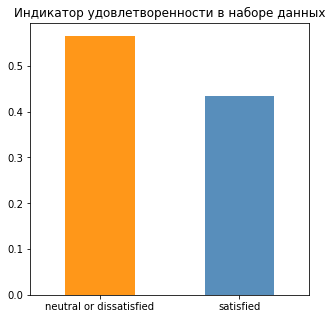

In [149]:
fig = plt.figure(figsize = (5, 5))
data_raw.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Индикатор удовлетворенности в наборе данных')
plt.show()

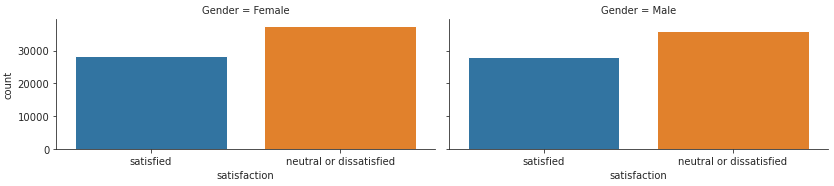

In [150]:
with sns.axes_style(style='ticks'):
     sns.catplot("satisfaction", col="Gender", col_wrap=2, data=data_raw, kind="count", height=2.5, aspect=2.3)  

__Вывод:__ гендерное распределение нейтральных/неудовлетворенных и удовлетворенных клиентов схоже. Как для пассажиров мужского, так и для женского пола количество нейтральных/неудовлетворенных клиентов выше по сравнению с количеством довольных клиентов.

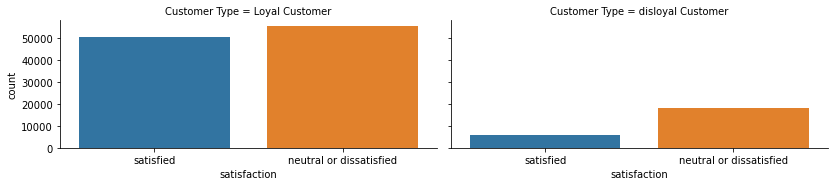

In [151]:
sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=data_raw, kind="count", height=2.5, aspect=2.3)

__Вывод:__ Cреди лояльных пассажиров, которых много, соотношение довольных и нейтрально/недовольных почти близко

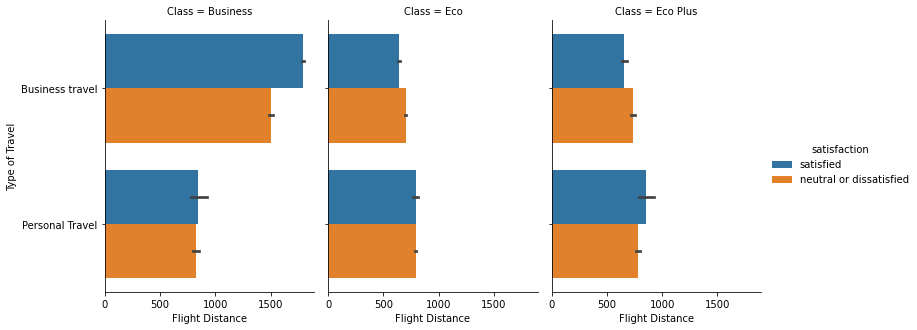

In [152]:
sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=data_raw, kind="bar", height=4.5, aspect=.8)

__Вывод:__ При  поездках в категории бизнес-класса количество довольных пассажиров выше при больших расстояние полета. Для остальных комбинаций наблюдается почти равное распределение довольных и нейтрально/неудовлетворенных пассажиров.

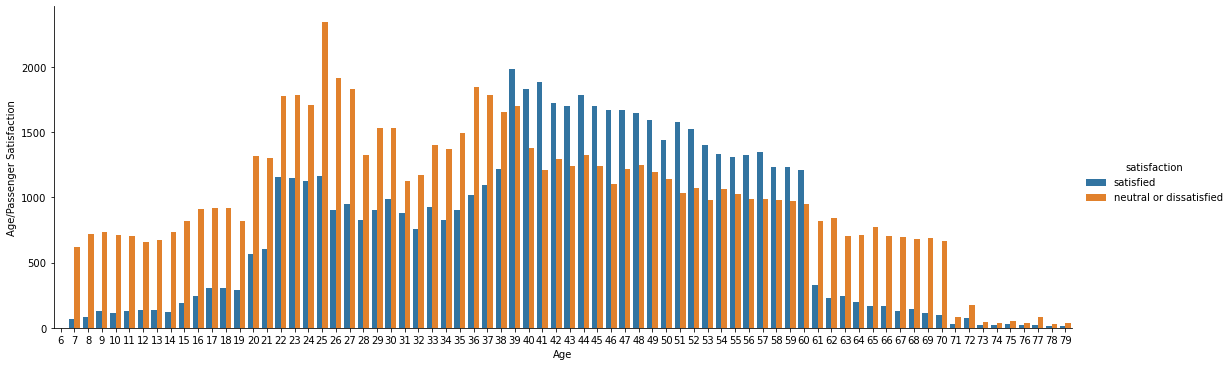

In [153]:
sns.catplot("Age", data=data_raw, aspect=3.0, kind='count', hue="satisfaction", order=range(6, 80)).set_ylabels('Age/Passenger Satisfaction')

__Вывод:__ В возрасте от 7 до 38 лет и от 61 до 79 лет количество нейтральных/неудовлетворенных пассажиров очень велико по сравнению с удовлетворенными пассажирами. С другой стороны, в возрастной группе 39–60 лет количество довольных пассажиров выше по сравнению с нейтральными/недовольными пассажирами.

## Обработать пропущенные значения
Было выяснено, что пропущенно 393 значений в 'Arrival Delay in Minutes'.
Убедимся в этом еще раз:

In [154]:
total = data_raw.isnull().sum().sort_values(ascending=False)
percent = (data_raw.isnull().sum()/data_raw.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay in Minutes,393,0.003026
Gender,0,0.000000
Seat comfort,0,0.000000
Departure Delay in Minutes,0,0.000000
Cleanliness,0,0.000000


Заполним пропцущенные значения:

In [155]:
data_raw['Arrival Delay in Minutes'].fillna(data_raw['Arrival Delay in Minutes'].median(axis = 0), axis=0 , inplace=True)

Приведем описание таблице ниже, которая описывает категориальные признаки. Здесь :
- top - наиболее встречающееся значение;
- freq - частота наиболее встречающегося значения;
- count - количество значений;
- unique - количество уникальных значений.

In [156]:
data_describe = data_raw.describe(include=['category'])
data_describe

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,2,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,65899,106100,89693,62160,32320,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969


Видно, что есть признаки, которые небинарные, поэтому проведём обработку категориальных значений.
## Обработка категориальных признаков

In [157]:
categ_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']
categ_columns

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

Рассмотрим бинарные признаки:

In [158]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'category']; describe = data_raw.describe(include=['category'])

In [159]:
data_raw.update({col: data_raw[col].cat.codes for col in categ_columns if describe[col]['unique'] == 2})

Рассмотри небинарные признаки: 

In [160]:
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
nonbinary = pd.get_dummies(data_raw[nonbinary_columns])

##  Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.

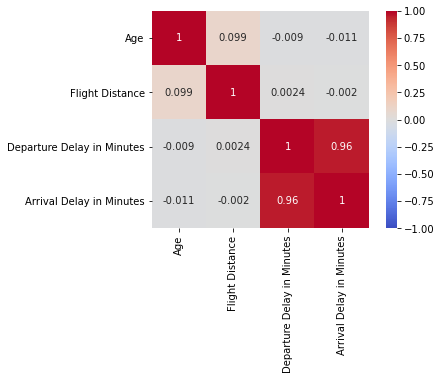

In [161]:
corr_mat = data_raw.corr()
sns.heatmap(corr_mat, square=True, annot=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass

In [162]:
corr_mat = data_raw.corr()

In [163]:
#corr_mat - Если захочется вывести отдельно в табличке

__Вывод__: Между признаками "Departure Delay in Minutes" и  "Arrival Delay in Minutes" высокая корреляция.
Можно удалить один признак из пары сильно коррелирующих признаков для того, чтобы уменьшить число рассматриваемых признаков. То есть можно удалить признак Arrival Delay in Minutes.

In [164]:
data_raw.drop("Arrival Delay in Minutes", axis =1, inplace= True)

## Провести нормализацию

Некоторые алгоритмы машинного обучения чувствительны к масштабированию данных,например, метод ближайших соседей, метод опорных векторов и т.д.

In [165]:
num_columns = [c for c in data_raw.columns if data_raw[c].dtype.name != 'category' and c != 'satisfaction' ]
data_numerical = data_raw[num_columns]

In [166]:
data_raw[num_columns] = (data_raw[num_columns] - data_raw[num_columns].mean(axis = 0))/data_raw[num_columns].std(axis = 0)
data_raw.describe()

,Age,Flight Distance,Departure Delay in Minutes
count,1.298800e+05,1.298800e+05,1.298800e+05
mean,-4.589714e-17,1.778554e-16,-4.394245e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.144797e+00,-1.162277e+00,-3.864796e-01
25%,-8.219896e-01,-7.782991e-01,-3.864796e-01
50%,3.783516e-02,-3.472009e-01,-3.864796e-01
75%,7.653792e-01,5.550977e-01,-7.128007e-02
max,3.014152e+00,3.802370e+00,4.142999e+01


Соберём все данные:

In [167]:
Y= data_raw['satisfaction']

In [168]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
data_raw = pd.concat((data_raw[num_columns], nonbinary, data_raw[binary_columns]), axis = 1)

## Разбить данные на обучающую и тестовую выборки

In [169]:
X = data_raw

In [170]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Departure Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and dri

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 555)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

In [172]:
print(N_train, N_test)

97410 32470


## Запустить классификатор (регрессию) ближайших соседей

In [173]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [179]:
search = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 21)}, cv = 5).fit(X_train, y_train)

print(1 - search.best_score_)
print( search.best_estimator_.n_neighbors)

0.0641720562570578
7


In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

kNNf = KNeighborsClassifier()
kNNf.n_neighbors = search.best_estimator_.n_neighbors
kNNf.fit(X_train, y_train)

y_train_prediction = kNNf.predict(X_train)
y_test_prediction = kNNf.predict(X_test)
cm = confusion_matrix(y_train, y_train_prediction)
     

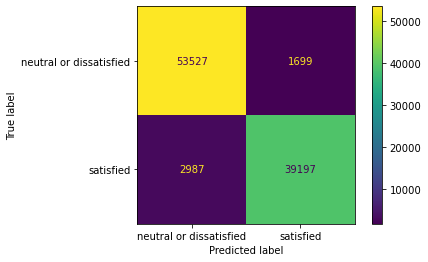

In [182]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kNNf.classes_)
disp.plot()

In [183]:
print(classification_report(y_test, y_test_prediction))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     18226
              satisfied       0.94      0.92      0.93     14244

               accuracy                           0.94     32470
              macro avg       0.94      0.94      0.94     32470
           weighted avg       0.94      0.94      0.94     32470



In [186]:
err_train = np.mean(y_train != kNNf.predict(X_train))
err_test  = np.mean(y_test  != kNNf.predict(X_test))

In [187]:
print(err_train, err_test)

0.048105943948259934 0.06033261472128118


In [184]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.035756082537727135


__ВЫВОД:__

-Безусловно алгоритм Random Forest, чем метод ближайших соседей;

-0.0 ошибка на обучающей выборке, и  0.035756082537727135 ошибка на тестовой выборке при методе random forest; а у knn - 0.06033261472128118